In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### Ques 16.3

In [2]:
# Load the CSV file
file_path = r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\DepartmentStoreSales.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data 
print(data.head())

   Quarter  Sales
0        1  50147
1        2  49325
2        3  57048
3        4  76781
4        5  48617


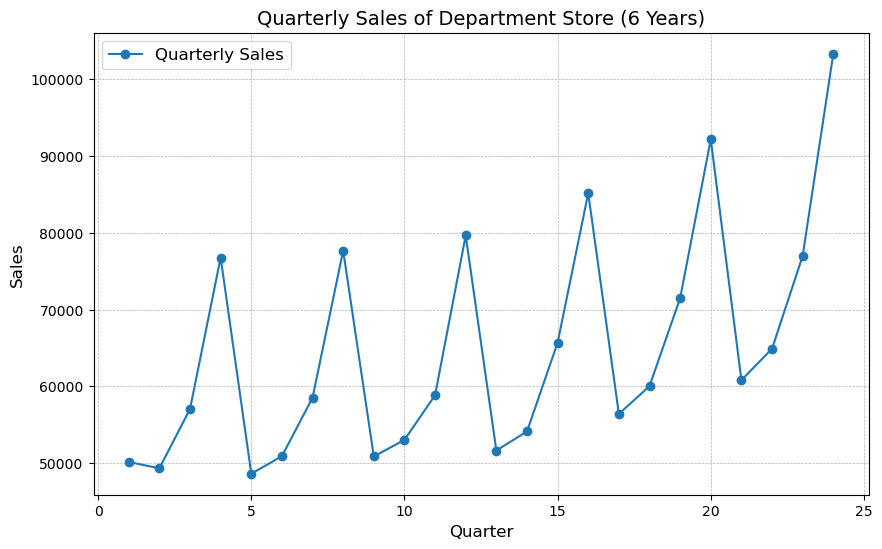

In [3]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Quarter'], data['Sales'], marker='o', linestyle='-', label='Quarterly Sales')
plt.title('Quarterly Sales of Department Store (6 Years)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

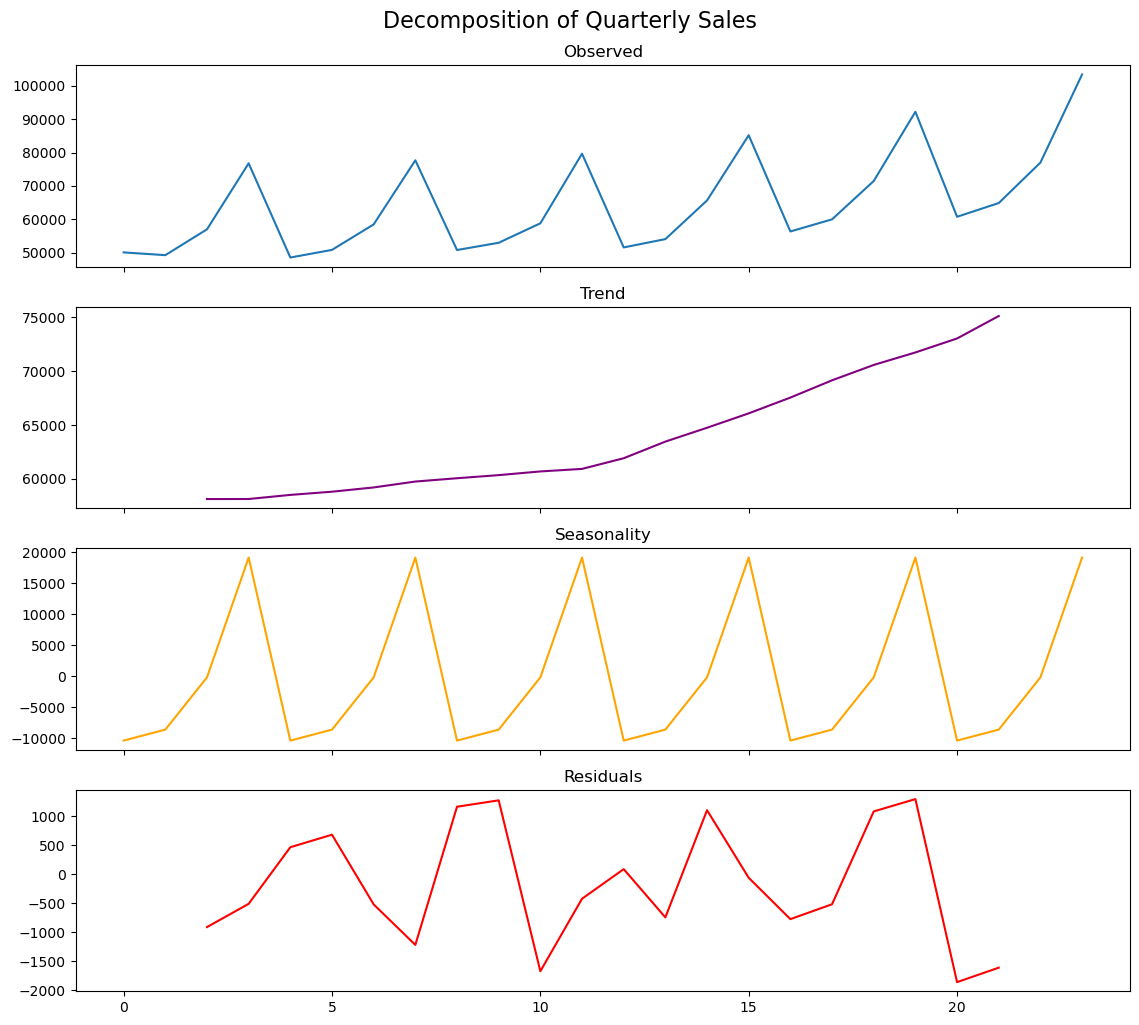

In [4]:
# Decomposing the time series
data.reset_index(drop=True, inplace=True)

# Perform decomposition
decomposition = seasonal_decompose(data['Sales'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(11.5, 10), sharex=True)
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title('Observed')
axes[1].plot(decomposition.trend, label='Trend', color='purple')
axes[1].set_title('Trend')
axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
plt.tight_layout()
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [5]:
# Level
average_level = decomposition.observed.mean()
average_level

64757.375

In [6]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: -181.40625000000057


#### Ques 16.4

In [7]:
# Reading the Appliance shipments file
shipments_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\ApplianceShipments.csv")

In [8]:
shipments_df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [9]:
# Convert Quarter column to datetime format (e.g., '1985-Q1' to proper dates)
shipments_df['Quarter'] = (shipments_df['Quarter']).astype(str)


In [10]:
# Map quarters to months
quarter_to_month = {
    'Q1': '01',  # January
    'Q2': '04',  # April
    'Q3': '07',  # July
    'Q4': '10'   # October
}

# Convert 'Quarter' to datetime
shipments_df['Quarter'] = shipments_df['Quarter'].apply(
    lambda x: pd.to_datetime(x.split('-')[1] + '-' + quarter_to_month[x.split('-')[0]])
)

In [11]:
shipments_df.head()

,Quarter,Shipments
0,1985-01-01,4009
1,1985-04-01,4321
2,1985-07-01,4224
3,1985-10-01,3944
4,1986-01-01,4123


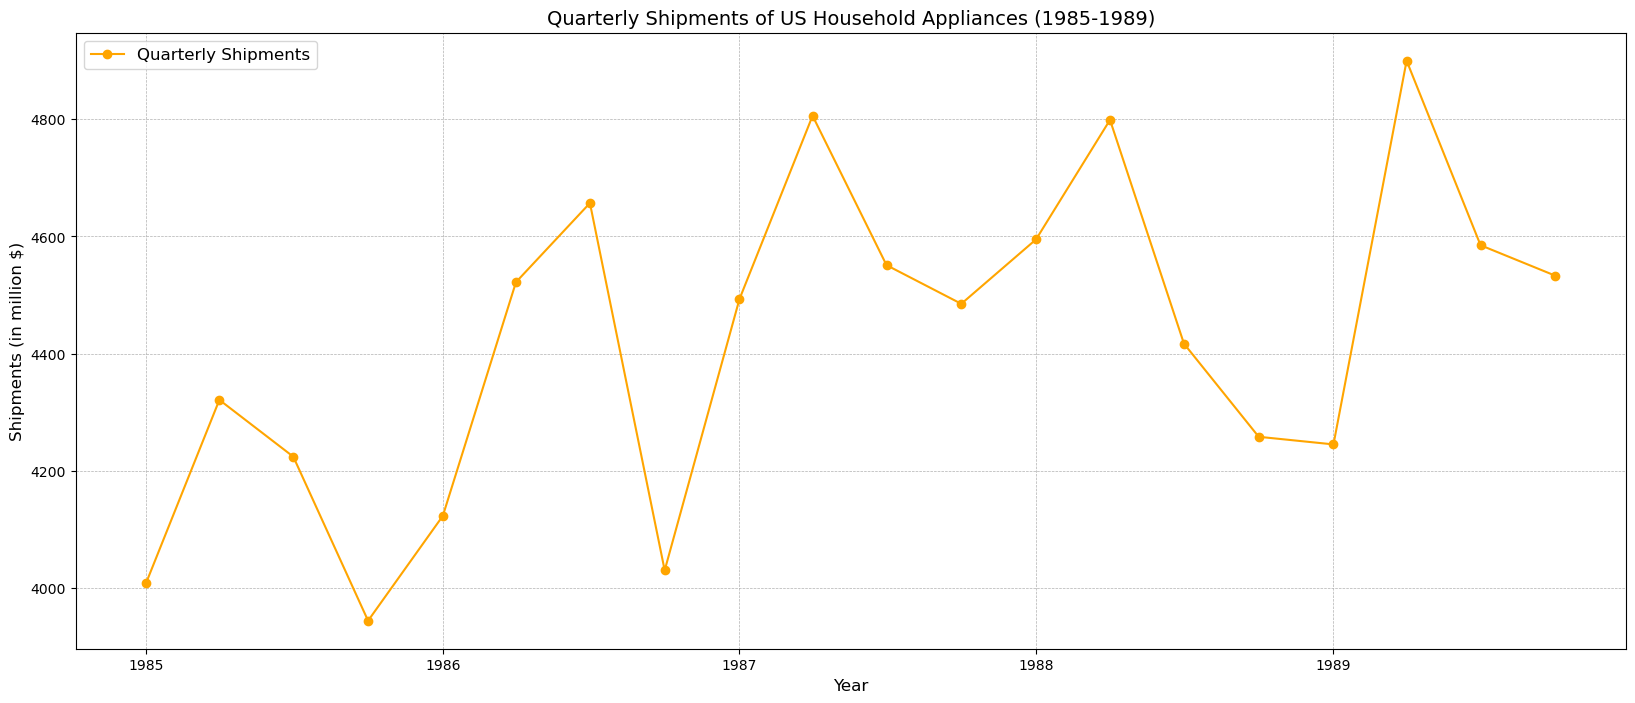

In [12]:
# Plotting the time series
plt.figure(figsize=(20, 8))
plt.plot(shipments_df['Quarter'], shipments_df['Shipments'], marker='o', linestyle='-', label='Quarterly Shipments', color= 'orange')
plt.title('Quarterly Shipments of US Household Appliances (1985-1989)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Shipments (in million $)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

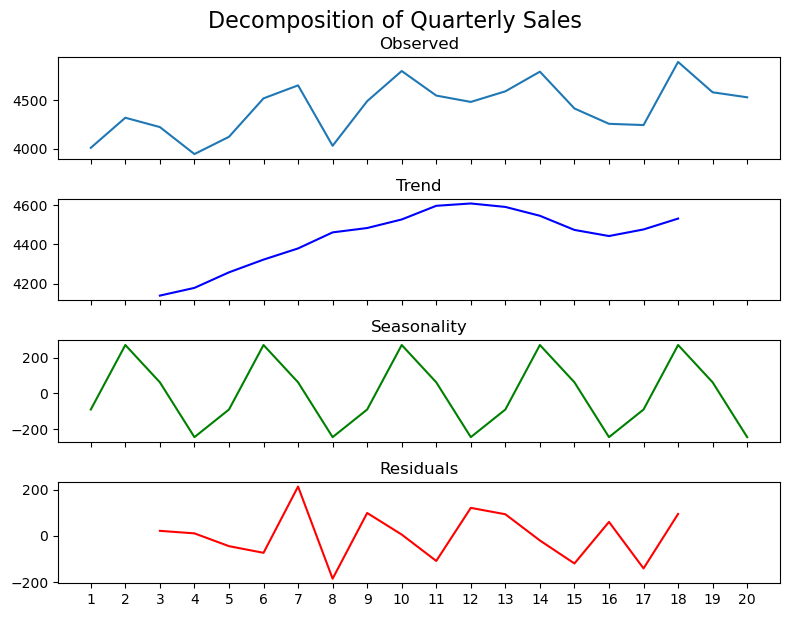

In [13]:
# Perform decomposition
decomposition = seasonal_decompose(shipments_df['Shipments'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot each component with appropriate labels
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title('Observed')

axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].set_title('Trend')

axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality')

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')

# x-axis has whole numbers for quarters
plt.xticks(ticks=range(len(shipments_df['Shipments'])), labels=range(1, len(shipments_df['Shipments']) + 1))
plt.tight_layout()
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [14]:
# Level
average_level = decomposition.observed.mean()
average_level

4424.85

In [15]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 2.3515625


#### Ques 16.5

In [16]:
work_hours_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\CanadianWorkHours.csv")

In [17]:
work_hours_df.head()

,Year,Hours
0,1966,37.2
1,1967,37.0
2,1968,37.4
3,1969,37.5
4,1970,37.7


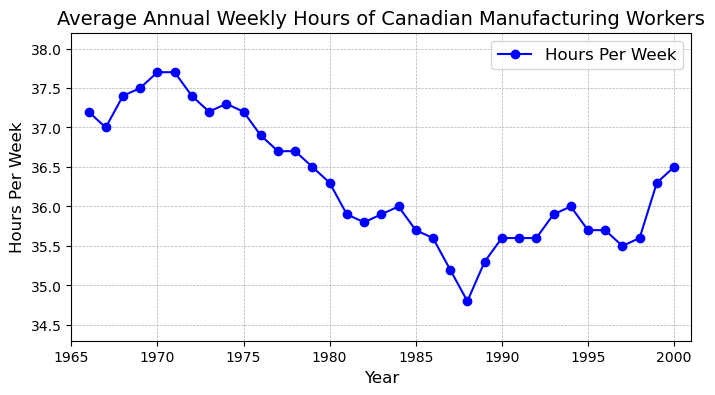

In [18]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(work_hours_df['Year'], work_hours_df['Hours'], marker='o', linestyle='-', color='blue', label='Hours Per Week')

# Adjust axes
plt.xlim(work_hours_df['Year'].min() - 1, work_hours_df['Year'].max() + 1)  # Add padding to x-axis
plt.ylim(work_hours_df['Hours'].min() - 0.5, work_hours_df['Hours'].max() + 0.5)  # Add padding to y-axis

# Add labels, title, and grid
plt.title('Average Annual Weekly Hours of Canadian Manufacturing Workers', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hours Per Week', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

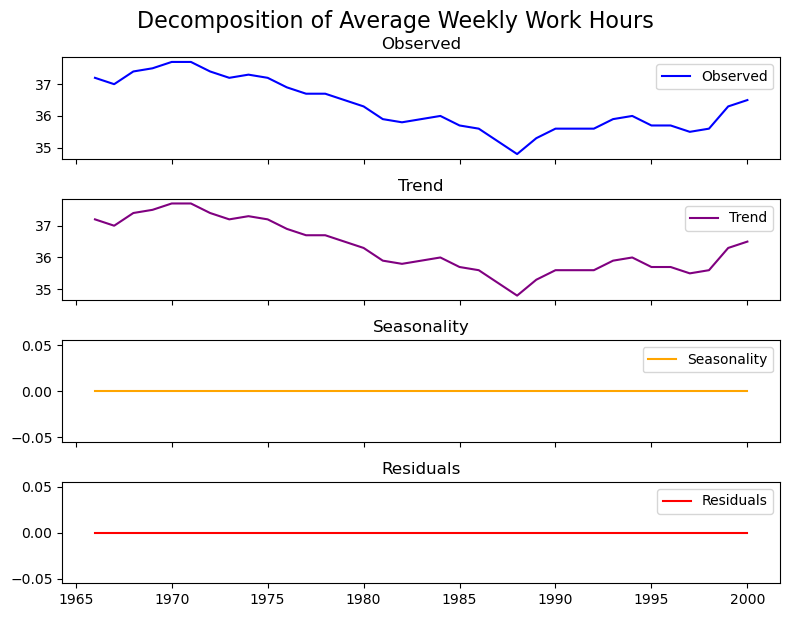

In [19]:
# Set 'Year' as the index and ensure it's treated as a time series
work_hours_df.set_index('Year', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(work_hours_df['Hours'], model='additive', period=1)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].set_title('Observed')
axes[0].legend()

axes[1].plot(decomposition.trend, label='Trend', color='purple')
axes[1].set_title('Trend')
axes[1].legend()

axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[2].legend()

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
axes[3].legend()

plt.tight_layout()
plt.suptitle('Decomposition of Average Weekly Work Hours', fontsize=16, y=1.02)
plt.show()

In [20]:
# Level
average_level = decomposition.observed.mean()
average_level

36.311428571428564

In [21]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 0.0


#### Ques 16.6

In [22]:
souvenir_sales_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\SouvenirSales.csv")

In [23]:
souvenir_sales_df.head()

,Date,Sales
0,Jan-95,1664.81
1,Feb-95,2397.53
2,Mar-95,2840.71
3,Apr-95,3547.29
4,May-95,3752.96


In [24]:
souvenir_sales_df.dtypes

Date      object
Sales    float64
dtype: object

In [25]:
# Convert 'Date' column to datetime format and sort the data by date
souvenir_sales_df['Date_sales'] = pd.to_datetime(souvenir_sales_df['Date'], format='%b-%y')
souvenir_sales_df = souvenir_sales_df.sort_values('Date_sales')

In [26]:
souvenir_sales_df['Date_sales'].unique().value_counts().sort_index()

1995-01-01    1
1995-02-01    1
1995-03-01    1
1995-04-01    1
1995-05-01    1
             ..
2001-08-01    1
2001-09-01    1
2001-10-01    1
2001-11-01    1
2001-12-01    1
Name: count, Length: 84, dtype: int64

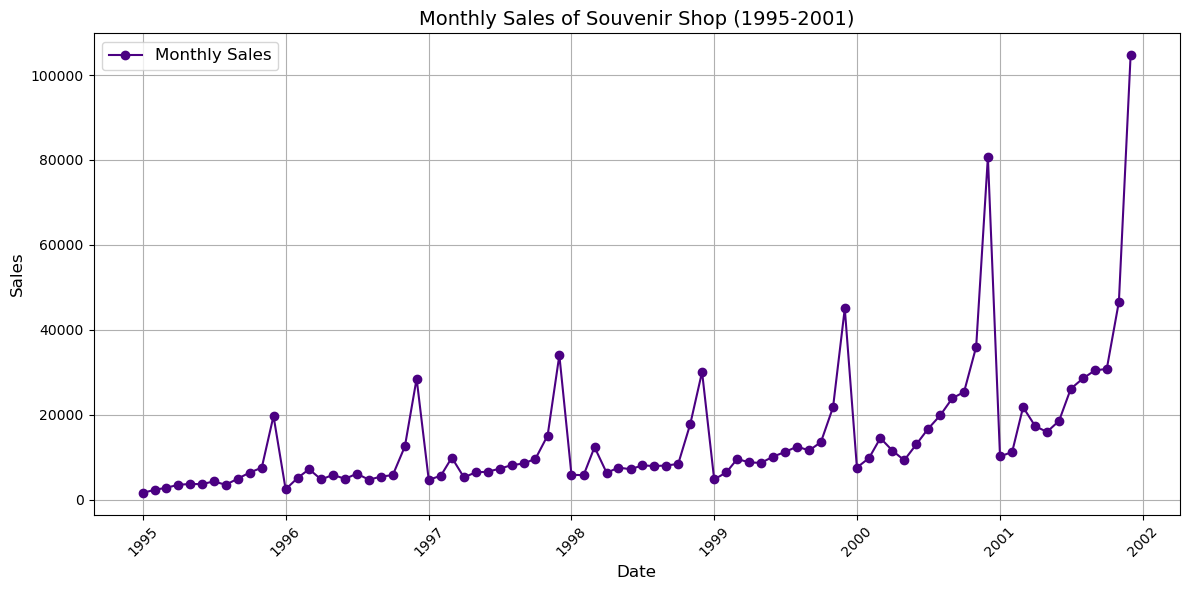

In [27]:
# Plot the time series 
plt.figure(figsize=(12, 6))
plt.plot(souvenir_sales_df['Date_sales'], souvenir_sales_df['Sales'], marker='o', linestyle='-', label='Monthly Sales', color ='indigo')
plt.title('Monthly Sales of Souvenir Shop (1995-2001)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

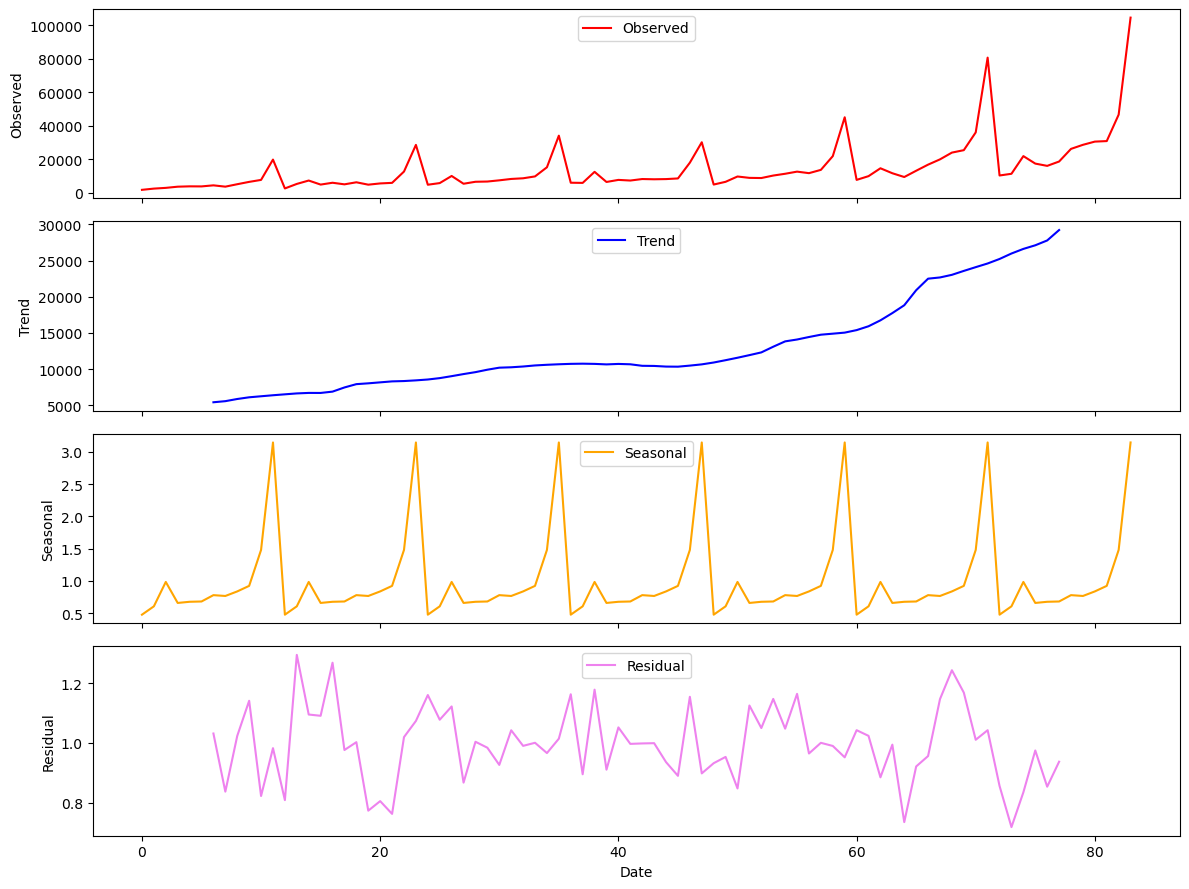

In [28]:
# Decompose the time series
decomposition = seasonal_decompose(souvenir_sales_df['Sales'], model='multiplicative', period=12)

fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

axes[0].plot(decomposition.observed, label='Observed', color='red')
axes[0].legend(loc='upper center')
axes[0].set_ylabel('Observed')

axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].legend(loc='upper center')
axes[1].set_ylabel('Trend')

axes[2].plot(decomposition.seasonal, label='Seasonal', color='orange')
axes[2].legend(loc='upper center')
axes[2].set_ylabel('Seasonal')

axes[3].plot(decomposition.resid, label='Residual', color='violet')
axes[3].legend(loc='upper center')
axes[3].set_ylabel('Residual')

# Set a shared x-axis label
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [29]:
# Level
average_level = decomposition.observed.mean()
average_level

14315.58714285714

In [30]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 0.9936300029204216


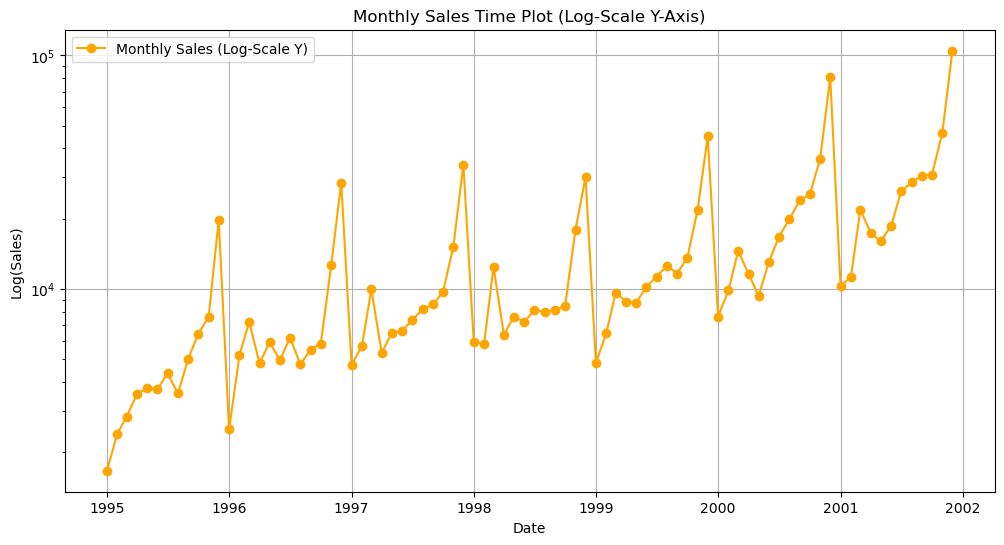

In [31]:
# Log-scale time plot
plt.figure(figsize=(12, 6))
plt.plot(souvenir_sales_df['Date_sales'], souvenir_sales_df['Sales'], marker='o', linestyle='-', label='Monthly Sales (Log-Scale Y)', color ='orange')
plt.yscale('log')
plt.title('Monthly Sales Time Plot (Log-Scale Y-Axis)')
plt.xlabel('Date')
plt.ylabel('Log(Sales)')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
import numpy as np
np.log10(80721.71)

4.906990353373774

In [33]:
# Partitioning the data into training (1995-2000) and validation (2001)
training_data = souvenir_sales_df[souvenir_sales_df['Date_sales'] < '2001-01-01']
validation_data = souvenir_sales_df[souvenir_sales_df['Date_sales'] >= '2001-01-01']

# Displaying the results
print("Training Data (last 5 records): ")
print(training_data[['Date_sales', 'Sales']].tail())

print("\nValidation Data (first 5 records):")
print(validation_data[['Date_sales', 'Sales']].head())

Training Data (last 5 records): 
   Date_sales     Sales
67 2000-08-01  19888.61
68 2000-09-01  23933.38
69 2000-10-01  25391.35
70 2000-11-01  36024.80
71 2000-12-01  80721.71

Validation Data (first 5 records):
   Date_sales     Sales
72 2001-01-01  10243.24
73 2001-02-01  11266.88
74 2001-03-01  21826.84
75 2001-04-01  17357.33
76 2001-05-01  15997.79


#### Ques 16.7

In [34]:
shampoo_sales_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\ShampooSales.csv")

In [35]:
shampoo_sales_df.head()

,Month,Shampoo Sales
0,Jan-95,266.0
1,Feb-95,145.9
2,Mar-95,183.1
3,Apr-95,119.3
4,May-95,180.3


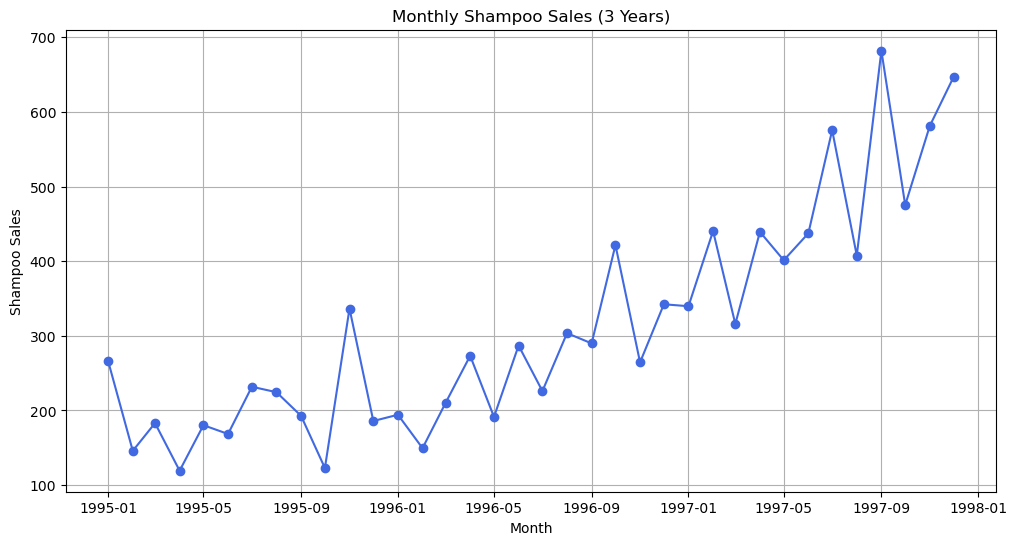

In [36]:
# Convert 'Month' column to datetime
shampoo_sales_df['Month'] = pd.to_datetime(shampoo_sales_df['Month'], format='%b-%y')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(shampoo_sales_df['Month'], shampoo_sales_df['Shampoo Sales'], marker='o', linestyle='-', color = 'royalblue')
plt.title('Monthly Shampoo Sales (3 Years)')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales')
plt.grid(True)
plt.show()

In [37]:
shampoo_sales_df.set_index('Month', inplace=True)

# Decompose the time series (additive model)
decomposition = seasonal_decompose(shampoo_sales_df['Shampoo Sales'], model='additive', period=12)

# Plot the decomposed components with legends and shared x-axis
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].set_ylabel('Observed')
axes[0].legend(loc='upper left')

# Trend
axes[1].plot(decomposition.trend, label='Trend', color='green')
axes[1].set_ylabel('Trend')
axes[1].legend(loc='upper left')

# Seasonal
axes[2].plot(decomposition.seasonal, label='Seasonal', color='orange')
axes[2].set_ylabel('Seasonal')
axes[2].legend(loc='upper left')

# Residual
axes[3].plot(decomposition.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend(loc='upper left')

# Shared x-axis label
axes[3].set_xlabel('Month')

# Display the plot
plt.suptitle('Decomposition of Shampoo Sales (Additive Model)', fontsize=16)
plt.show()

In [38]:
# Level
average_level = decomposition.observed.mean()
average_level

14315.58714285714

In [39]:
train = shampoo_sales_df.iloc[:-12]  # First 36 months
test = shampoo_sales_df.iloc[-12:]  # Last 12 months

In [40]:
print("Training Data (last 5 records):")
print(train[['Month', 'Shampoo Sales']].tail())

print("\nTest Data (first 5 records):")
print(test[['Month', 'Shampoo Sales']].head())

Training Data (last 5 records):
        Month  Shampoo Sales
19 1996-08-01          303.6
20 1996-09-01          289.9
21 1996-10-01          421.6
22 1996-11-01          264.5
23 1996-12-01          342.3

Test Data (first 5 records):
        Month  Shampoo Sales
24 1997-01-01          339.7
25 1997-02-01          440.4
26 1997-03-01          315.9
27 1997-04-01          439.3
28 1997-05-01          401.3


In [41]:
train['TimeIndex'] = range(1, len(train) + 1)
test['TimeIndex'] = range(len(train) + 1, len(train) + len(test) + 1)

X_train = train[['TimeIndex']]
y_train = train['Shampoo Sales']
X_test = test[['TimeIndex']]
y_test = test['Shampoo Sales']

C:\Users\Arushi\AppData\Local\Temp\ipykernel_30428\4125173442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TimeIndex'] = range(1, len(train) + 1)
C:\Users\Arushi\AppData\Local\Temp\ipykernel_30428\4125173442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TimeIndex'] = range(len(train) + 1, len(train) + len(test) + 1)


In [42]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for both training and validation sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [43]:
# Creating results DataFrame for training predictions
train_results = pd.DataFrame({
    'TimeIndex': X_train['TimeIndex'],
    'Actual Sales (Train)': y_train,
    'Predicted Sales (Train)': y_train_pred
})

# Creating results DataFrame for test predictions
test_results = pd.DataFrame({
    'TimeIndex': X_test['TimeIndex'],
    'Actual Sales (Test)': y_test,
    'Predicted Sales (Test)': y_test_pred
})
print("Train results: ")
print(train_results.head())
print("Test results: ")
print(test_results.head())

Train results: 
   TimeIndex  Actual Sales (Train)  Predicted Sales (Train)
0          1                 266.0               154.473000
1          2                 145.9               161.007957
2          3                 183.1               167.542913
3          4                 119.3               174.077870
4          5                 180.3               180.612826
Test results: 
    TimeIndex  Actual Sales (Test)  Predicted Sales (Test)
24         25                339.7              311.311957
25         26                440.4              317.846913
26         27                315.9              324.381870
27         28                439.3              330.916826
28         29                401.3              337.451783


In [44]:
# Evaluate metrics for training and test sets
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Arushi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
# Summarizing evaluation metrics
evaluation_summary = pd.DataFrame({
    "Metric": ["MAPE", "RMSE"],
    "Training": [train_mape, train_rmse],
    "Test": [test_mape, test_rmse]
})

print("evaluation summary: ")
evaluation_summary.head()

evaluation summary: 


,Metric,Training,Test
0,MAPE,0.214456,0.24757
1,RMSE,57.891004,162.65462


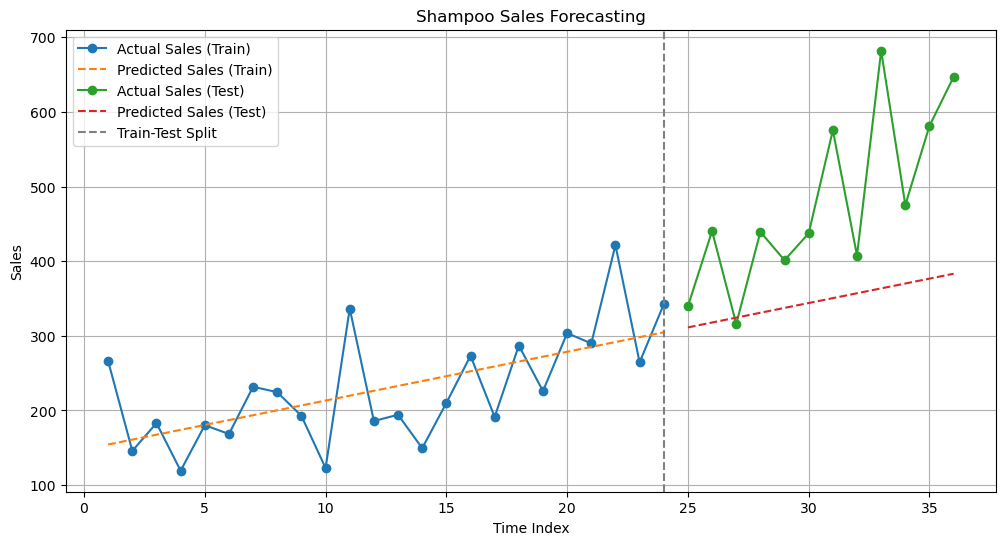

In [46]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train['TimeIndex'], y_train, label="Actual Sales (Train)", marker='o')
plt.plot(train['TimeIndex'], y_train_pred, label="Predicted Sales (Train)", linestyle='--')

# Plot test data
plt.plot(test['TimeIndex'], y_test, label="Actual Sales (Test)", marker='o')
plt.plot(test['TimeIndex'], y_test_pred, label="Predicted Sales (Test)", linestyle='--')

# Adding vertical line to indicate train-test split
plt.axvline(x=train['TimeIndex'].iloc[-1], color='gray', linestyle='--', label="Train-Test Split")

# Labels, title, and legend
plt.title("Shampoo Sales Forecasting")
plt.xlabel("Time Index")
plt.ylabel("Sales")
plt.legend()
plt.grid()

# Show the plot
plt.show()

C:\Users\Arushi\AppData\Local\Temp\ipykernel_30428\2716828501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Forecast'] = model.fittedvalues
C:\Users\Arushi\AppData\Local\Temp\ipykernel_30428\2716828501.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Forecast'] = model.forecast(len(validation))


      Dataset   MAPE (%)        RMSE
0    Training  28.242421   75.041373
1  Validation  21.239260  151.753437


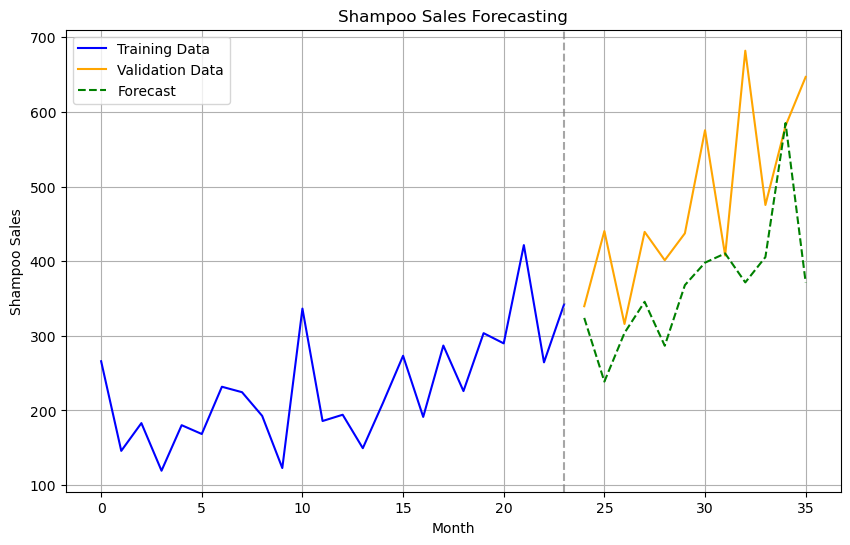

In [47]:
train = shampoo_sales_df.iloc[:-12]  # Training set: all data except the last 12 months
validation = shampoo_sales_df.iloc[-12:]  # Validation set: the last 12 months

# Fit a multiplicative Exponential Smoothing model
model = ExponentialSmoothing(
    train['Shampoo Sales'], trend="multiplicative", seasonal="multiplicative", seasonal_periods=12
).fit()

# Forecast for both training and validation periods
train['Forecast'] = model.fittedvalues
validation['Forecast'] = model.forecast(len(validation))

# Calculate MAPE and RMSE for training and validation sets
mape_train = mean_absolute_percentage_error(train['Shampoo Sales'], train['Forecast'])
rmse_train = np.sqrt(mean_squared_error(train['Shampoo Sales'], train['Forecast']))

mape_val = mean_absolute_percentage_error(validation['Shampoo Sales'], validation['Forecast'])
rmse_val = np.sqrt(mean_squared_error(validation['Shampoo Sales'], validation['Forecast']))

# Create and display evaluation metrics dataframe
evaluation_metrics = pd.DataFrame({
    "Dataset": ["Training", "Validation"],
    "MAPE (%)": [mape_train * 100, mape_val * 100],
    "RMSE": [rmse_train, rmse_val]
})
print(evaluation_metrics)

# Plot training, validation, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Shampoo Sales'], label='Training Data', color='blue', linewidth=1.5)
plt.plot(validation.index, validation['Shampoo Sales'], label='Validation Data', color='orange', linewidth=1.5)
plt.plot(validation.index, validation['Forecast'], label='Forecast', linestyle='--', color='green', linewidth=1.5)
plt.axvline(x=train.index[-1], color='gray', linestyle='--', alpha=0.7)  # Mark transition point
plt.title('Shampoo Sales Forecasting')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales')
plt.legend()
plt.grid(True)
plt.show()